# Rentals
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
from pandas import ExcelWriter
from pandas import ExcelFile
import scipy.stats as stats

# Output File (CSV)
output_rentaldata_file = "output_data/rentals4counties.csv"

## Reading Data and Creating a DataFrame

In [4]:
# Reading the rental file
rentaldata_df = pd.read_excel('../resources/County_MedianRentalPrice_3Bedroom.xlsx')
rentaldata_df.columns = rentaldata_df.iloc[0]
rentaldata_df.set_index('RegionName', inplace=True)
rentaldata_df.head()

,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
RegionName,,,,,,,,,,,,,,,,,,,,,
RegionName,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
Los Angeles County,CA,Los Angeles-Long Beach-Anaheim,6,37,1,NaN,2400,2400,2411,2460,...,3189.5,3145,3200,3206.5,3216.5,3250,3250,3295,3249.5,3225
Cook County,IL,Chicago-Naperville-Elgin,17,31,2,NaN,1695,1650,1695,1595,...,1900,1995,2100,2200,2200,2100,2000,1950,1895,1850
Harris County,TX,Houston-The Woodlands-Sugar Land,48,201,3,NaN,NaN,NaN,NaN,NaN,...,1550,1575,1600,1600,1600,1600,1599,1595,1575,1573.5
Maricopa County,AZ,Phoenix-Mesa-Scottsdale,4,13,4,NaN,NaN,NaN,NaN,NaN,...,1548,1569,1595,1600,1623,1650,1637.5,1635,1627,1609


In [5]:


selectcounties_df = rentaldata_df.loc[ ['Los Angeles County' , 'San Francisco County', 'Fresno County', 'Shasta County'] , : ]
selectcounties_df

,State,Metro,StateCodeFIPS,MunicipalCodeFIPS,SizeRank,2010-01,2010-02,2010-03,2010-04,2010-05,...,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11
RegionName,,,,,,,,,,,,,,,,,,,,,
Los Angeles County,CA,Los Angeles-Long Beach-Anaheim,6,37,1,NaN,2400,2400,2411,2460,...,3189.5,3145,3200,3206.5,3216.5,3250,3250,3295,3249.5,3225
San Francisco County,CA,San Francisco-Oakland-Hayward,6,75,65,NaN,NaN,NaN,NaN,NaN,...,5372.5,5300,5350,5400,5600,5800,5800,5744.5,5595,5495
Fresno County,CA,Fresno,6,19,45,NaN,NaN,NaN,NaN,NaN,...,1495,1450,1495,1500,1500,1500,1500,1500,1495,1495
Shasta County,CA,Redding,6,89,331,NaN,NaN,NaN,NaN,NaN,...,1450,1400,1525,1525,1500,1550,1525,1497.5,1495,1497.5


In [6]:
col2014=selectcounties_df.loc[: , "2014-01":"2014-12"]
selectcounties_df['Average 2014 Rentals'] = col2014.mean(axis=1)
col2015=selectcounties_df.loc[: , "2015-01":"2015-12"]
selectcounties_df['Average 2015 Rentals'] = col2015.mean(axis=1)
col2016=selectcounties_df.loc[: , "2016-01":"2016-12"]
selectcounties_df['Average 2016 Rentals'] = col2016.mean(axis=1)
col2017=selectcounties_df.loc[: , "2017-01":"2017-12"]
selectcounties_df['Average 2017 Rentals'] = col2017.mean(axis=1)
col2018=selectcounties_df.loc[: , "2018-01":"2018-12"]
selectcounties_df['Average 2018 Rentals'] = col2018.mean(axis=1)
selected_counties_years_df=selectcounties_df.loc[:,["Average 2014 Rentals", "Average 2015 Rentals", "Average 2016 Rentals", "Average 2017 Rentals", "Average 2018 Rentals"]]
selected_counties_years_df

,Average 2014 Rentals,Average 2015 Rentals,Average 2016 Rentals,Average 2017 Rentals,Average 2018 Rentals
RegionName,,,,,
Los Angeles County,2376.250000,2711.666667,2827.500000,3020.416667,3121.625000
San Francisco County,5374.166667,5978.541667,5685.041667,5446.250000,5498.583333
Fresno County,1106.041667,1180.000000,1239.583333,1337.708333,1424.375000
Shasta County,1161.250000,1243.125000,1250.416667,1300.416667,1390.416667


In [8]:

selected_counties_years_df_transposed=selected_counties_years_df.transpose()
selected_counties_years_df_transposed
selected_counties_years_df_transposed.to_csv("../output files/rentals4counties.csv")

In [15]:
housingdata_df=pd.read_csv('../output files/zillow_clean_df.csv')
housingdata_df.head()

#housingdata_df.columns = housingdata_df.iloc[1]
#housingdata_df.set_index('RegionName', inplace=True)
#housingdata_transposed_df=housingdata_df.transpose()
#housingdata_transposed_df

,Unnamed: 0,RegionName,2014 Avg Price,2015 Avg Price,2016 Avg Price,2017 Avg Price,2018 Avg Price
0,0,Los Angeles County,4.569512e+05,4.823743e+05,5.180629e+05,5.553628e+05,5.960945e+05
1,44,Fresno County,1.803132e+05,1.916491e+05,2.037746e+05,2.206875e+05,2.387993e+05
2,64,San Francisco County,1.194855e+06,1.292884e+06,1.388946e+06,1.471771e+06,1.620576e+06
3,342,Shasta County,2.020655e+05,2.163343e+05,2.262383e+05,2.414369e+05,2.530390e+05


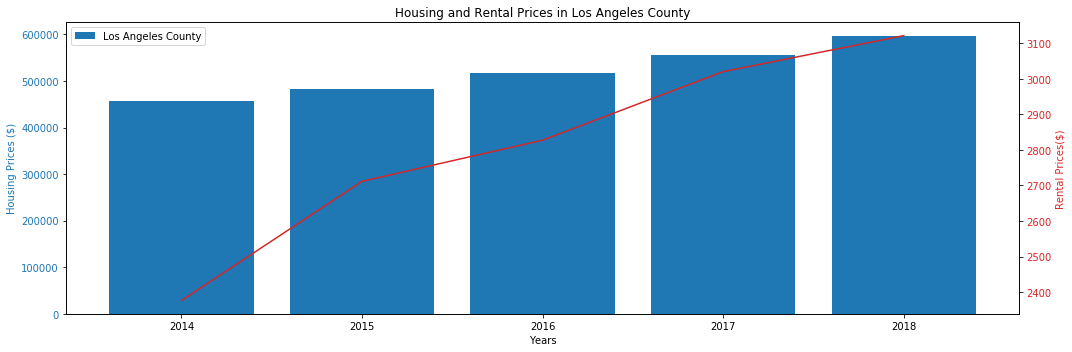

In [33]:
x= ['2014','2015', '2016', '2017', '2018']
y1line = housingdata_transposed_df["Los Angeles County"]
y2bar = selected_counties_years_df_transposed["Los Angeles County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.set_title('Housing and Rental Prices in Los Angeles County')
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Los Angeles County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("RentalandHousingPricesinLACounty.png")
plt.show()

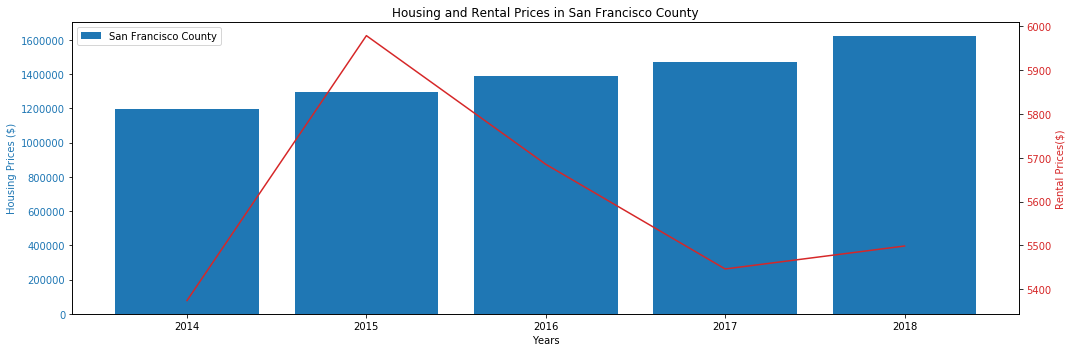

In [34]:
x= ['2014','2015', '2016', '2017', '2018']
y1line = housingdata_transposed_df["San Francisco County"]
y2bar = selected_counties_years_df_transposed["San Francisco County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Housing and Rental Prices in San Francisco County')
ax1.legend(['San Francisco County'], facecolor='w')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("RentalandHousingPricesinSFCounty.png")
plt.show()

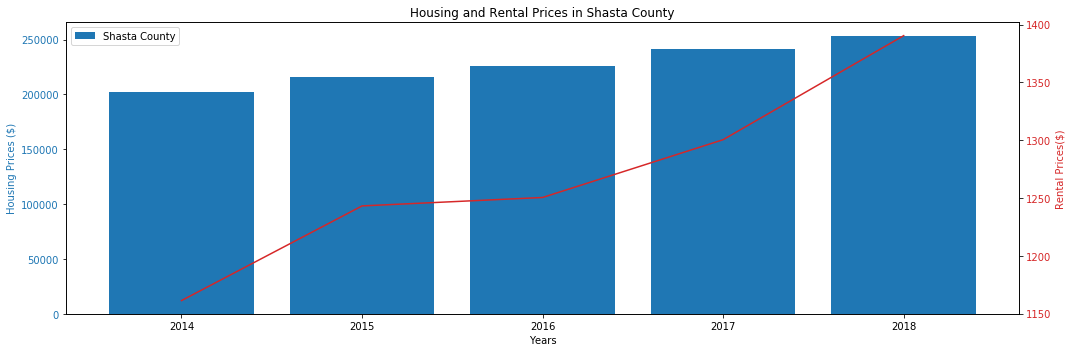

In [35]:
x= ['2014','2015', '2016', '2017', '2018']
y1line = housingdata_transposed_df["Shasta County"]
y2bar = selected_counties_years_df_transposed["Shasta County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Shasta County'], facecolor='w')
ax1.set_title('Housing and Rental Prices in Shasta County')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("RentalandHousingPricesinShastaCounty.png")
plt.show()

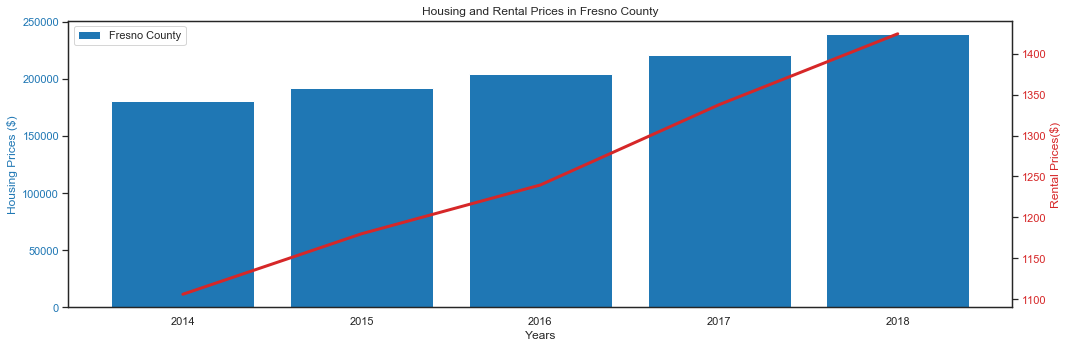

In [65]:
x= ['2014','2015', '2016', '2017', '2018']
y1line = housingdata_transposed_df["Fresno County"]
y2bar = selected_counties_years_df_transposed["Fresno County"]

fig, ax1 = plt.subplots(figsize=(15,5))

color = 'tab:blue'
ax1.set_xlabel('Years')
ax1.set_ylabel('Housing Prices ($)', color=color)
ax1.bar(x, y1line, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(['Fresno County'], facecolor='w')
ax1.set_title('Housing and Rental Prices in Fresno County')
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rental Prices($)', color=color)  # we already handled the x-label with ax1
ax2.plot(x, y2bar, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig("RentalandHousingPricesinFresnoCounty.png")
plt.show()

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Rental averages for 4 counties

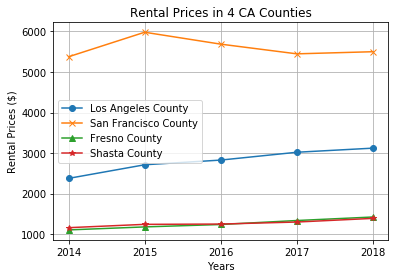

In [36]:
x= ['2014','2015', '2016', '2017', '2018']
plt.plot(x, selected_counties_years_df_transposed["Los Angeles County"], marker="o", label = "Los Angeles County")
plt.plot(x, selected_counties_years_df_transposed["San Francisco County"], marker="x", label = "San Francisco County")
plt.plot(x, selected_counties_years_df_transposed["Fresno County"], marker="^", label = "Fresno County")
plt.plot(x, selected_counties_years_df_transposed ["Shasta County"], marker="*", label = "Shasta County")


# Incorporate the other graph properties
plt.title("Rental Prices in 4 CA Counties")
plt.ylabel("Rental Prices ($)")
plt.xlabel("Years")
plt.grid(True)
plt.legend(loc="best")

#plt.xlim(0,4)
#plt.ylim(950,6500)
#plt.figure(figsize=(20,10))



# Save the figure
plt.savefig("RentalPricesin4Counties.png")

# Show plot
plt.show()

Collecting data for ANOVA and t Test

In [44]:
group1 = selected_counties_years_df_transposed ["Los Angeles County"] 
group2 = selected_counties_years_df_transposed["San Francisco County"]
group3 = selected_counties_years_df_transposed ["Shasta County"]
group4 = selected_counties_years_df_transposed["Fresno County"]

ANOVA shows p value to be significant 

In [45]:
stats.f_oneway(group1, group2, group3, group4)

F_onewayResult(statistic=500.9461360052821, pvalue=5.039318988502746e-16)

t Test shows significance between LA and Shasta and San Francisco rental prices means they are different but Fresno and Shasta are not different

In [46]:
stats.ttest_ind(group2, group3, equal_var=False)

Ttest_indResult(statistic=37.68337349106667, pvalue=2.798997125677211e-07)

In [47]:
stats.ttest_ind(group1, group3, equal_var=False)

Ttest_indResult(statistic=11.372907286194092, pvalue=0.00014098256766199854)

In [49]:
stats.ttest_ind(group3, group4, equal_var=False)

Ttest_indResult(statistic=0.17087855216510936, pvalue=0.8691693277893662)

In [50]:
stats.ttest_ind(group1, group2, equal_var=False)

Ttest_indResult(statistic=-16.42690622372466, pvalue=2.681567814305307e-07)

In [51]:
stats.ttest_ind(group1, group4, equal_var=False)

Ttest_indResult(statistic=10.946615634798594, pvalue=6.494719904989969e-05)

In [52]:
stats.ttest_ind(group2, group4, equal_var=False)

Ttest_indResult(statistic=35.490466710806594, pvalue=3.239459342261499e-08)